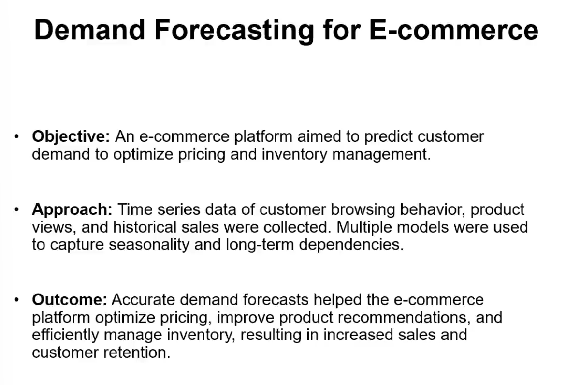

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('demand.csv')

data.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [3]:
# Check for missing values
missing_values = data.isnull().sum()

# Display the missing values
missing_values

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [4]:
# Fill the missing value in 'total_price' with the median of 'total_price' for the corresponding 'sku_id'

# First, calculate the median total_price for each sku_id
median_price_per_sku = data.groupby('sku_id')['total_price'].median()

# Then, fill the missing value
data['total_price'].fillna(data['sku_id'].map(median_price_per_sku), inplace = True)

# Check if there are any remaining missing values
data.isnull().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_13456\3906240434.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_price'].fillna(data['sku_id'].map(median_price_per_sku), inplace = True)


record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [5]:
# Convert the week column to datetime format
data['week'] = pd.to_datetime(data['week'], format='%d/%m/%y')

# Aggregate the data by week
weekly_data= data.groupby('week')['units_sold'].sum().reset_index()

# Display the first few rows of aggregated data
weekly_data.head(10)

,week,units_sold
0,2011-01-17,60029
1,2011-01-24,56752
2,2011-01-31,51467
3,2011-02-07,54656
4,2011-02-14,109207
5,2011-02-21,82986
6,2011-02-28,84153
7,2011-03-07,56231
8,2011-03-14,53376
9,2011-03-21,61539


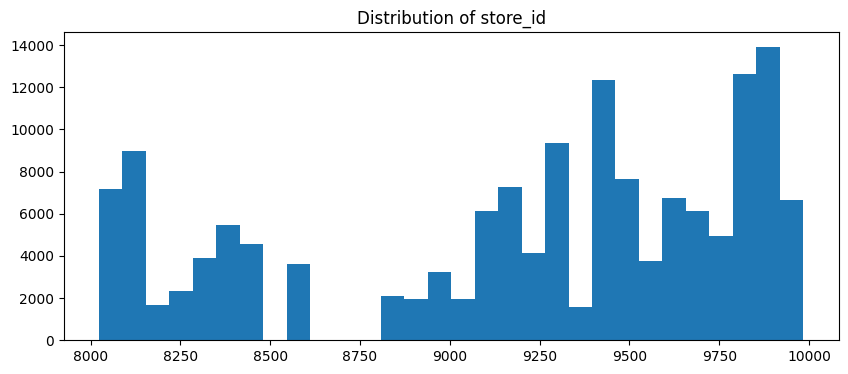

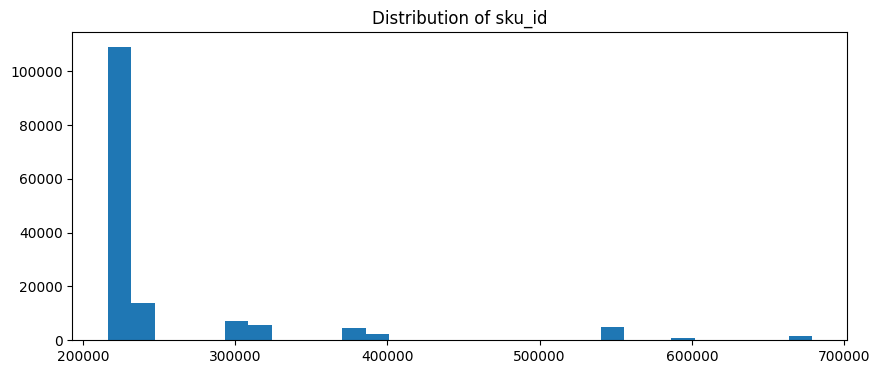

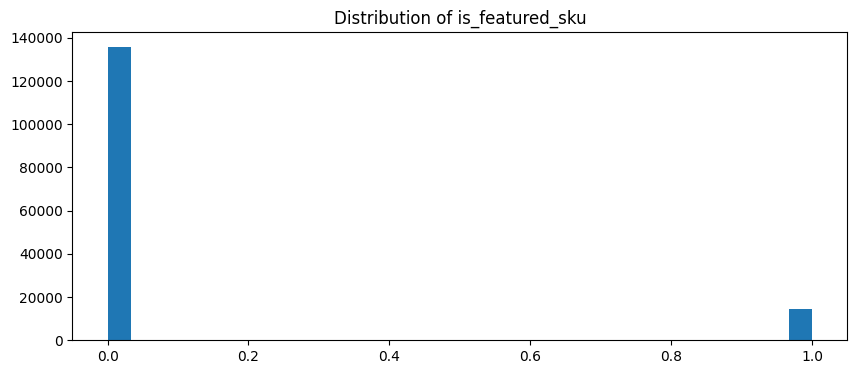

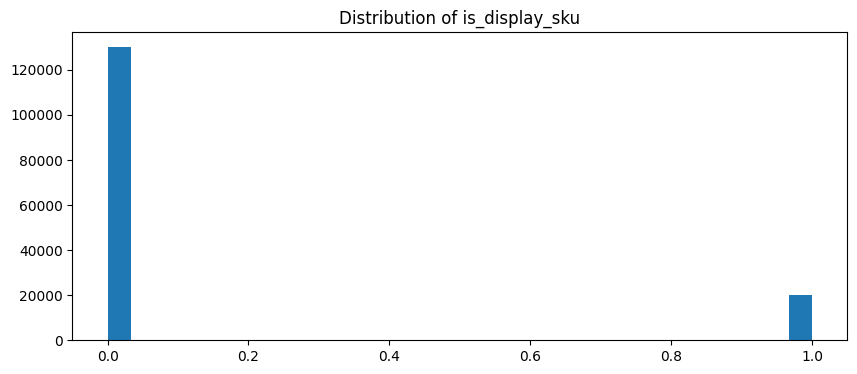

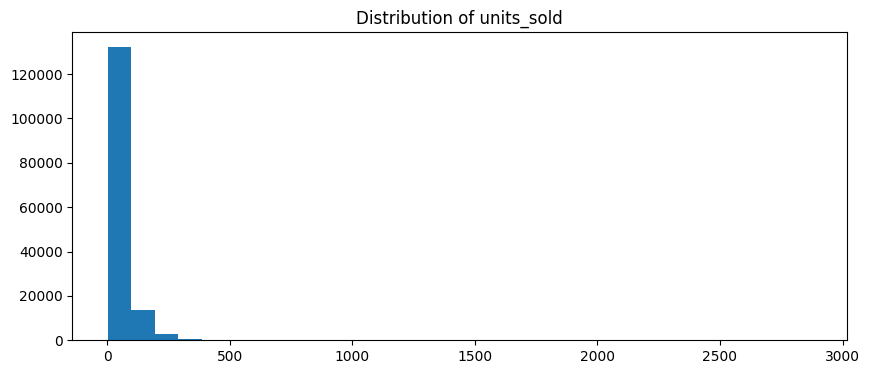

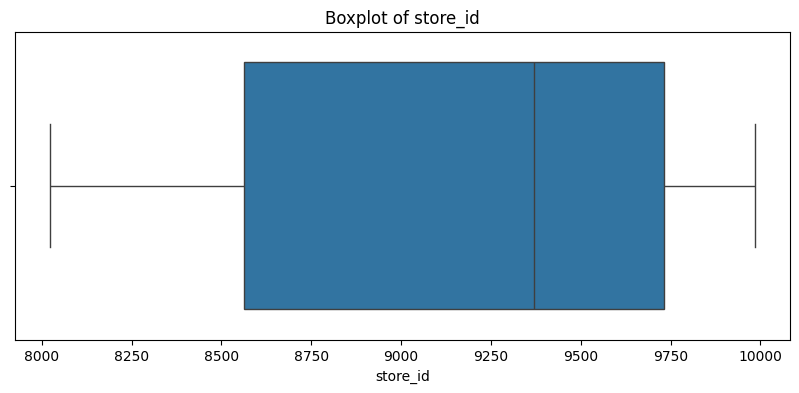

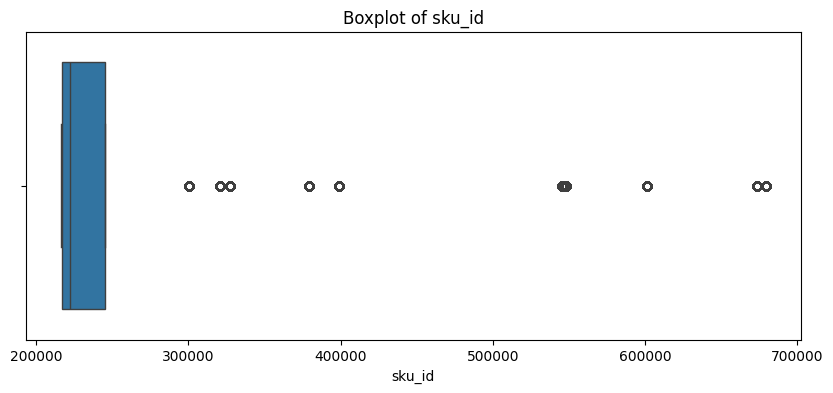

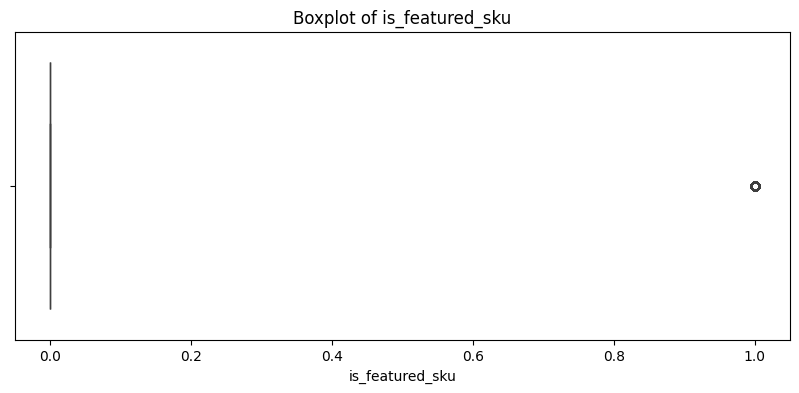

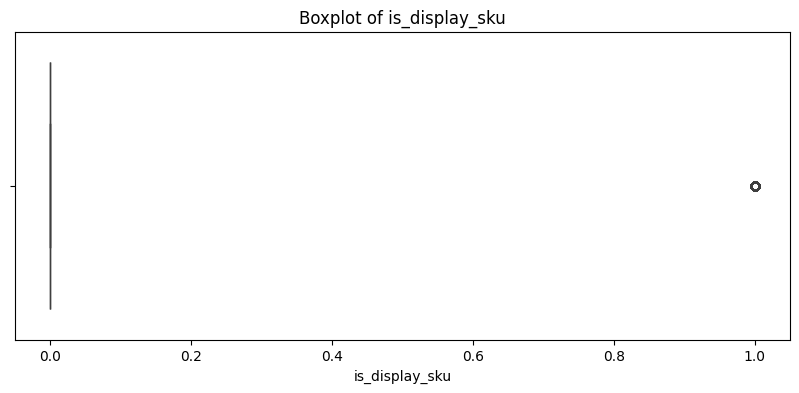

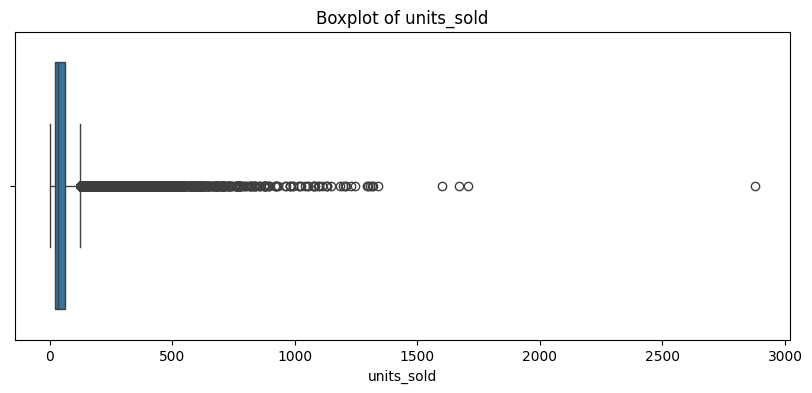

Text(0.5, 1.0, 'Correlation matrix heatmap')

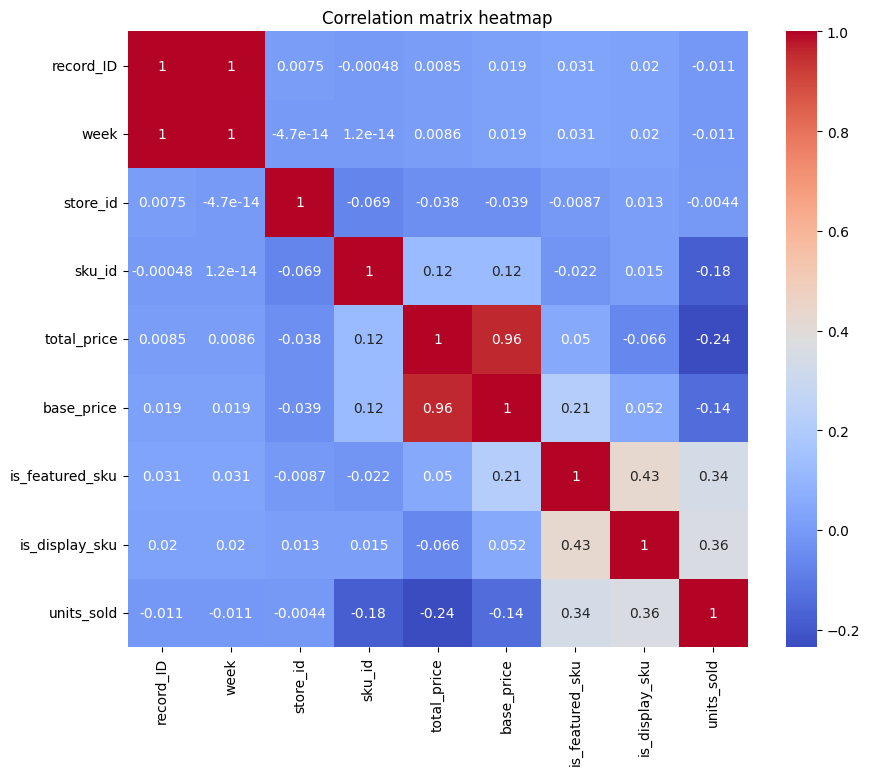

In [6]:
import seaborn as sns

# Plot histograms for categorical columns and the target variable

categorical_cols= ['store_id','sku_id','is_featured_sku','is_display_sku','units_sold']

for col in categorical_cols:
    plt.figure(figsize =(10,4))
    plt.hist(data[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Box Plot for numerical columns
numerical_cols = ['total_price',' base_price']

for col in categorical_cols:
    plt.figure(figsize =(10,4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Check the correlation between features
correlation = data.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation matrix heatmap')

Here are some observations based on the distribution of data and the correlation matrix:

store_id: The distribution shows that the dataset contains data from multiple stores. However, we don't have enough details to make more specific observations about the stores.

sku_id: The distribution suggests that the dataset contains data on multiple SKUs. Similarly, we can't make more specific observations without additional details.

is_featured_sku and is_display_sku: These are binary variables indicating whether the SKU was featured or displayed. The majority of SKUs were neither featured nor displayed.

units_sold: This variable, representing the number of units sold, shows a right-skewed distribution. Most of the values are low, but there are some weeks where a large number of units were sold.

total_price and base_price: These variables represent the total price and base price of the SKUs. There are some outliers, particularly for total price, which may be due to special sales or particularly expensive SKUs.

Looking at the correlation matrix, we see that is_featured_sku and is_display_sku have a moderate positive correlation with units_sold, indicating that when SKUs are featured or displayed, more units tend to be sold. There is also a slight negative correlation between total_price and units_sold, suggesting that lower priced items may sell in higher quantities.

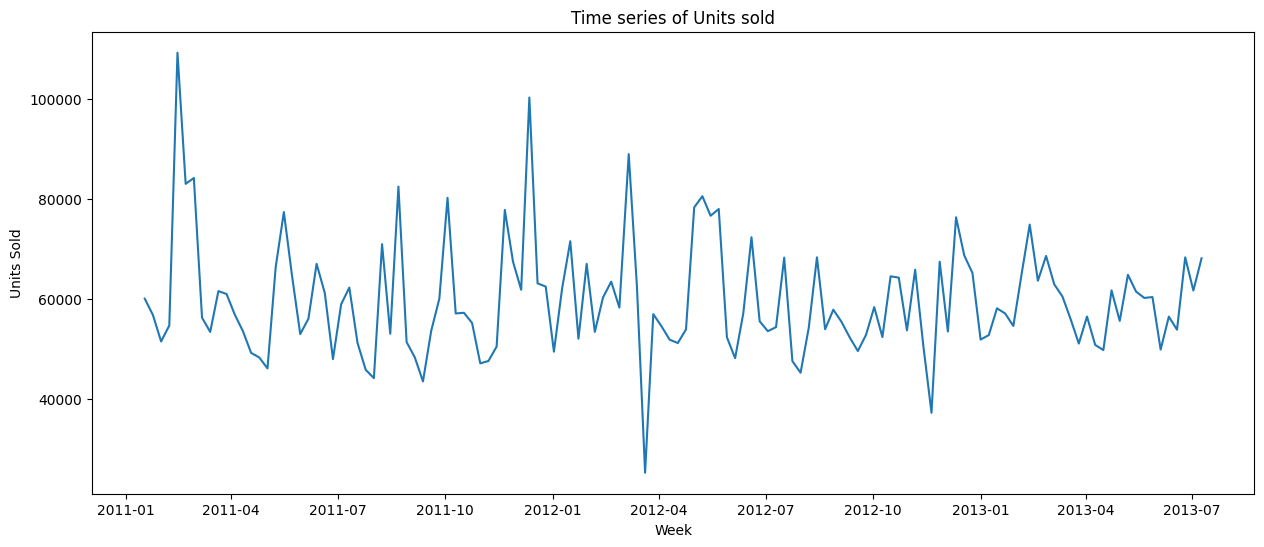

In [7]:
# Plot the time series of 'units_sold'

plt.figure(figsize =(15,6))
plt.plot(weekly_data['week'],weekly_data['units_sold'])
plt.title('Time series of Units sold')
plt.xlabel('Week')
plt.ylabel('Units Sold')
plt.show()

The time series plot of units_sold shows a fairly irregular pattern with some apparent seasonality. We can see periodic spikes, which could be related to specific events or seasons throughout the year. However, there is no clear increasing or decreasing trend over the entire time period.

Next, let's decompose the time series to more formally check for seasonality and trend. This involves breaking down the time series into three components:

Trend: The underlying pattern in the data.
Seasonality: Cyclical patterns in the data.
Residual: The remainder of the time series after the trend and seasonal components have been removed.
We'll use the seasonal_decompose function from the statsmodels library to do this. Let's proceed with that.

In [8]:
weekly_data

,week,units_sold
0,2011-01-17,60029
1,2011-01-24,56752
2,2011-01-31,51467
3,2011-02-07,54656
4,2011-02-14,109207
...,...,...
125,2013-06-11,56433
126,2013-06-18,53818
127,2013-06-25,68283
128,2013-07-02,61655


In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set 'week' as the index for the data

weekly_data.set_index('week',inplace=True)

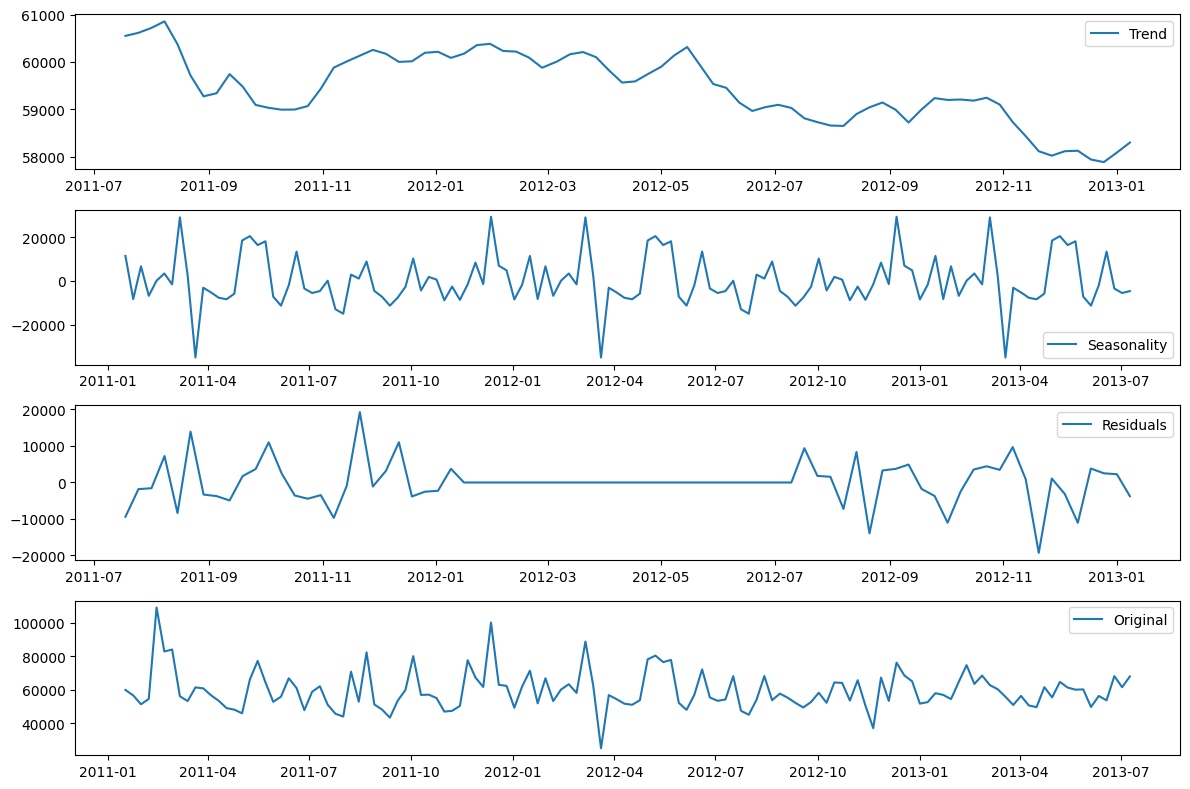

In [10]:
# Decompose the timeseries with a period of 52 weeks

decomposition = seasonal_decompose(weekly_data['units_sold'],period=52)

# Plot the trend, seasonality and residuals
plt.figure(figsize=(12,8))

# Trend
plt.subplot(411)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')

# Seasonality
plt.subplot(412)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')

# Residuals
plt.subplot(413)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')

# Original
plt.subplot(414)
plt.plot(weekly_data['units_sold'], label='Original')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

The time series decomposition reveals the following insights:

Trend: The trend component shows a relatively stable pattern over time, indicating that there is no significant long-term increase or decrease in the total number of units sold.

Seasonality: The seasonality component shows a clear pattern that repeats annually. This suggests that there are specific times during the year when sales tend to be higher or lower.

Residuals: The residuals component represents the remainder of the time series after the trend and seasonal components have been removed. It shows irregular fluctuations, which could be due to random variations or other factors not captured by the trend and seasonality.

Next, we'll check for volatility in the time series. Volatility refers to the variation of price of a financial instrument over time. Here, we can consider it as the variation in the number of units sold over time. We can measure this by looking at the standard deviation of the percentage change in units_sold from one week to the next. Let's calculate this next.

After that, we'll calculate the moving average for the time series. The moving average is a commonly used technique in time series analysis to smooth out short-term fluctuations and highlight longer-term trends or cycles. We'll calculate the 4-week and 52-week (approximately one month and one year) moving averages.

In [12]:
# Calculate the percentage change in 'units_sold' from one week to the next

weekly_data['units_sold_pct_change'] = weekly_data['units_sold'].pct_change()

# Calculate the standard deviation of these percentage changes
volatility = weekly_data['units_sold_pct_change'].std()

volatility

np.float64(0.26059855014523764)

The standard deviation of the percentage change in units_sold from one week to the next is approximately 0.26. This means there is a fair amount of volatility or fluctuation in weekly sales, as the number of units sold can vary by about 26% from one week to the next.

Next, let's calculate and plot the 4-week and 52-week moving averages for units_sold.

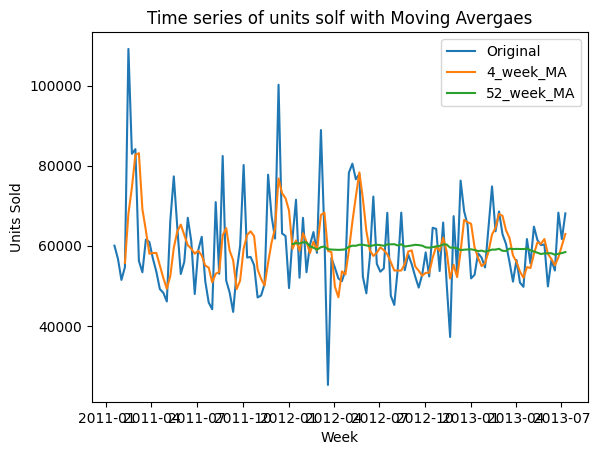

In [13]:
# Calculate the 4-week and 52 week moving averages

weekly_data['4_week_MA'] = weekly_data['units_sold'].rolling(window=4).mean()
weekly_data['52_week_MA'] = weekly_data['units_sold'].rolling(window=52).mean()

# PLot the original time series and moving averages
plt.plot(figsize=(15,6))

plt.plot(weekly_data['units_sold'],label='Original')
plt.plot(weekly_data['4_week_MA'],label='4_week_MA')
plt.plot(weekly_data['52_week_MA'],label='52_week_MA')

plt.title('Time series of units solf with Moving Avergaes')
plt.xlabel('Week')
plt.ylabel('Units Sold')
plt.legend()

plt.show()

The plot shows the original time series of units_sold, along with its 4-week and 52-week moving averages. Here's what we can observe:

The 4-week moving average closely follows the original time series, smoothing out some of the weekly fluctuations but still capturing the overall variability in sales. The 52-week moving average smooths out the seasonality and provides a clearer view of the long-term trend in sales. It shows a relatively stable pattern over time, which is consistent with the trend component we observed from the time series decomposition. In summary, we've conducted a comprehensive exploratory data analysis and time series analysis of the dataset.

To summarize:

Data Inspection and Cleaning: The dataset contained one missing value in the total_price column, which we filled using the median total price for the corresponding SKU.

Exploratory Data Analysis: The dataset contains sales data from multiple stores and for multiple SKUs. Most of the SKUs were neither featured nor displayed. There is a moderate positive correlation between is_featured_sku and is_display_sku and units_sold, indicating that when SKUs are featured or displayed, more units tend to be sold. There is a slight negative correlation between total_price and units_sold, suggesting that lower priced items may sell in higher quantities.

Time Series Analysis: The time series of units_sold shows an irregular pattern with some apparent seasonality, but no clear increasing or decreasing trend. The decomposition of the time series revealed a stable trend component and a clear seasonal pattern that repeats annually. The residuals show irregular fluctuations, which could be due to random variations or other factors not captured by the trend and seasonality. The volatility analysis showed that the number of units sold can vary by about 26% from one week to the next. The 4-week and 52-week moving averages provided a smoothed view of the time series.

let's first visually check the autocorrelation plot to confirm the presence of seasonality. This plot can provide a qualitative indication of the presence and type of seasonality.

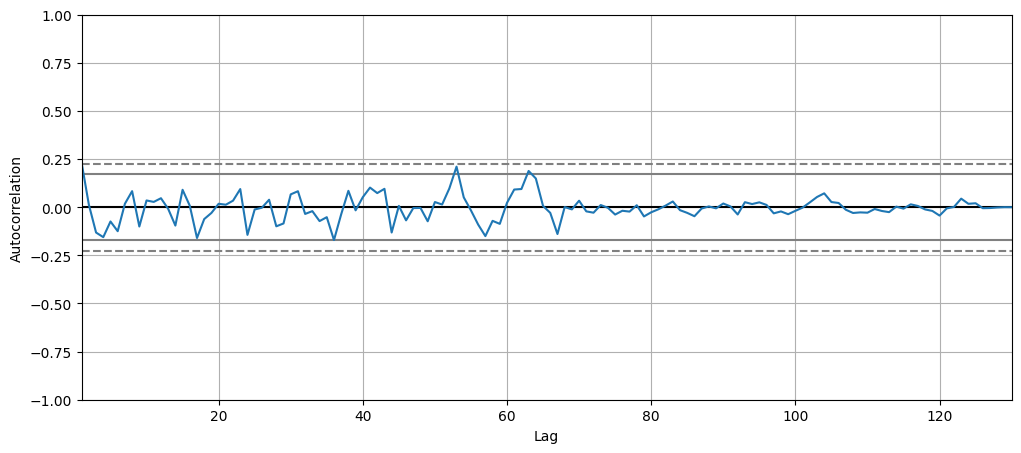

In [14]:
from pandas.plotting import autocorrelation_plot

# Plot the autocorrelation
plt.figure(figsize=(12,5))
autocorrelation_plot(weekly_data['units_sold'])
plt.show()

The autocorrelation plot confirms the presence of seasonality in the data. We can see a sinusoidal pattern, which indicates a repeating pattern at regular intervals (seasonality).

Now let's fit a Holt-Winters seasonal model to our data. Since the amplitude of the seasonal variation doesn't increase over time, we'll use the additive version of the Holt-Winters' method. We'll train the model on the first 80% of the data and then test it on the remaining 20%. We can then evaluate the accuracy of the model's forecasts.

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

# Split the data into train and test sets
train_data=  weekly_data['units_sold'][:int(0.8*(len(weekly_data)))]
test_data=  weekly_data['units_sold'][int(0.8*(len(weekly_data))):]

# Fit the model
model = ExponentialSmoothing(train_data,seasonal='add',seasonal_periods=52).fit()


c:\Users\HP\Desktop\Interview Prep\AI Engineer\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [18]:
weekly_data

,units_sold,units_sold_pct_change,4_week_MA,52_week_MA
week,,,,
2011-01-17,60029,NaN,NaN,NaN
2011-01-24,56752,-0.054590,NaN,NaN
2011-01-31,51467,-0.093124,NaN,NaN
2011-02-07,54656,0.061962,55726.00,NaN
2011-02-14,109207,0.998079,68020.50,NaN
...,...,...,...,...
2013-06-11,56433,0.132283,56697.50,58123.942308
2013-06-18,53818,-0.046338,55108.75,57768.403846
2013-06-25,68283,0.268776,57093.50,58014.211538


In [ ]:
# Resample the data to a weekly frequency
weekly_data_resampled= weekly_data['units_sold'].resample('W').sum()

# Split the resampled data in to training and test sets
train_data_resampled =weekly_data_resampled[:int(0.8*(len(weekly_data_resampled)))] 
test_data_resampled =weekly_data_resampled[int(0.8*(len(weekly_data_resampled))):] 

# Fit the model to resampled data
model_resampled = ExponentialSmoothing(train_data_resampled, seasonal='add', seasonal_periods=52).fit()

# Generate predictions on resampled data
predictions_resampled= model_resampled.predict(start= test_data_resampled.index[0], end = test_data_resampled.index[-1])

# Calculate the RMSE on the resampled data
rmse_resampled = sqrt (mean_squared_error(test_data_resampled, predictions_resampled))

rmse_resampled

9297.405309743459

The root mean squared error (RMSE) of the model's predictions on the test data is approximately 9297. This metric provides a measure of the accuracy of the model's forecasts.

Let's visualize the original time series along with the forecasted values to get a better understanding of the model's performance.

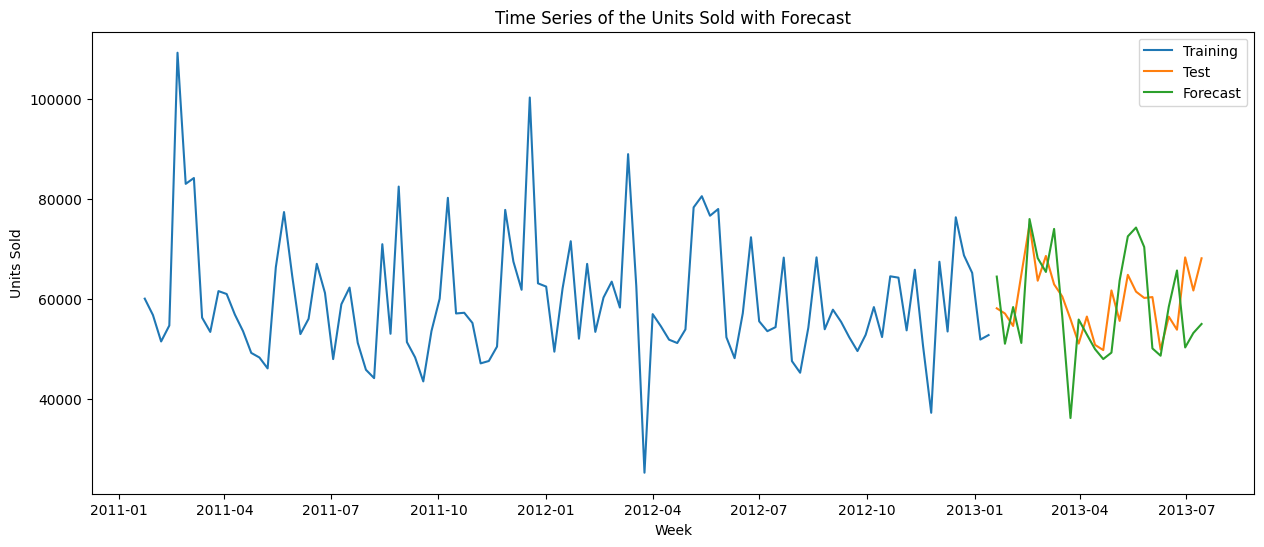

In [21]:
# Plot the original time series and the forecasted values

plt.figure(figsize=(15,6))

plt.plot(train_data_resampled, label='Training')
plt.plot(test_data_resampled, label='Test')
plt.plot(predictions_resampled, label='Forecast')

plt.title('Time Series of the Units Sold with Forecast')
plt.xlabel('Week')
plt.ylabel('Units Sold')
plt.legend()

plt.show()


The plot above shows the original time series (divided into training and test sets) along with the forecasted values from the Holt-Winters' model.

The forecasted values generally follow the pattern of the original time series, indicating that the model is able to capture the seasonality in the data. However, the forecast seems to underestimate the peaks in the original series, which is consistent with the relatively high RMSE value.

It's worth noting that time series forecasting can be a complex task and the accuracy of the forecasts can depend on many factors, such as the nature of the trend and seasonality in the data, the presence of outliers, and the choice of model and its parameters. There might be room for improving the model's performance by trying different models, tuning the model's parameters, or preprocessing the data in different ways.

##### Comparing Different Models

11:23:58 - cmdstanpy - INFO - Chain [1] start processing
11:23:59 - cmdstanpy - INFO - Chain [1] done processing


Holt-Winters RMSE: 9297.405309743459
ARIMA RMSE: 6235.736166484375
Prophet RMSE: 7713.608605745758


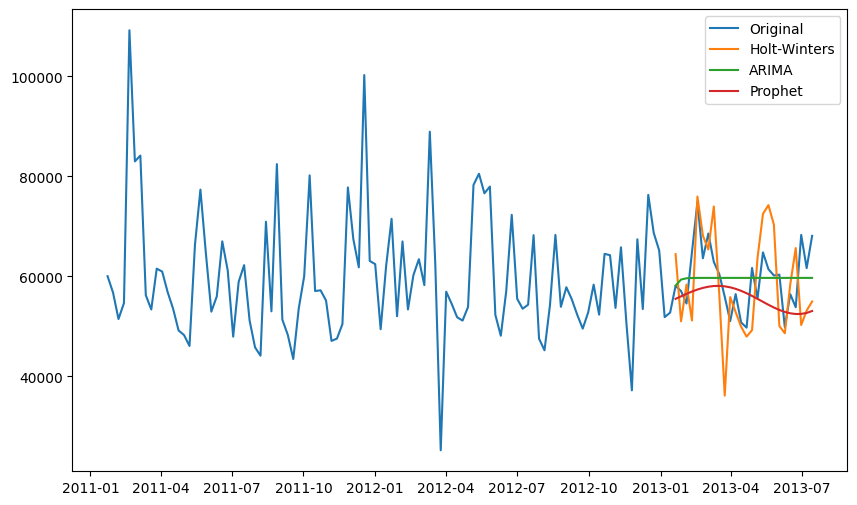

The best model is: ARIMA


In [ ]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('demand.csv')

# Convert the 'week' column to datetime format and set it as the index
data['week'] = pd.to_datetime(data['week'], format='%d/%m/%y')
data.set_index('week', inplace=True)

# Aggregate the data by week
weekly_data = data['units_sold'].resample('W').sum()

# Split the data into train and test sets
train_data = weekly_data[:int(0.8*(len(weekly_data)))]
test_data = weekly_data[int(0.8*(len(weekly_data))):]

# Fit a Holt-Winters model
hw_model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=52).fit()

# Generate predictions from the Holt-Winters model
hw_predictions = hw_model.predict(start=test_data.index[0], end=test_data.index[-1])

# Fit an ARIMA model
arima_model = ARIMA(train_data, order=(1, 0, 0)).fit()

# Generate predictions from the ARIMA model
arima_predictions = arima_model.predict(start=test_data.index[0], end=test_data.index[-1])

# Prepare the data for Prophet
prophet_data = weekly_data.reset_index()
prophet_data.columns = ['ds', 'y']

# Split the data into train and test sets
train_data_prophet = prophet_data[:int(0.8*(len(prophet_data)))]
test_data_prophet = prophet_data[int(0.8*(len(prophet_data))):]

# Fit a Prophet model
prophet_model = Prophet(yearly_seasonality=True)
# because there is yearly seasonality
prophet_model.fit(train_data_prophet)

# Generate predictions from the Prophet model for the test period
prophet_future = prophet_model.make_future_dataframe(periods=len(test_data))
prophet_predictions = prophet_model.predict(prophet_future)

# Calculate the RMSE for each model
hw_rmse = sqrt(mean_squared_error(test_data, hw_predictions))
arima_rmse = sqrt(mean_squared_error(test_data, arima_predictions))
prophet_rmse = sqrt(mean_squared_error(test_data, prophet_predictions['yhat'][-len(test_data):]))

# Print the RMSE for each model
print(f'Holt-Winters RMSE: {hw_rmse}')
print(f'ARIMA RMSE: {arima_rmse}')
print(f'Prophet RMSE: {prophet_rmse}')

# Plot the original data and the predictions from each model
plt.figure(figsize=(10, 6))
plt.plot(weekly_data, label='Original')
plt.plot(hw_predictions, label='Holt-Winters')
plt.plot(arima_predictions, label='ARIMA')
plt.plot(test_data.index, prophet_predictions['yhat'][-len(test_data):].values, label='Prophet')
plt.legend()
plt.show()

# Compare the models and print the name of the best model
rmse_values = [hw_rmse, arima_rmse, prophet_rmse]
model_names = ['Holt-Winters', 'ARIMA', 'Prophet']
best_model = model_names[rmse_values.index(min(rmse_values))]

print(f'The best model is: {best_model}')

The plot compares actual sales data (blue) with forecasts from three models — Holt-Winters, ARIMA, and Prophet. The original series shows high volatility with no clear long-term trend, making it difficult to model accurately. The Holt-Winters forecast (orange) fluctuates sharply, overreacting to short-term changes, while the ARIMA forecast (green) remains nearly flat, indicating underfitting and failure to capture variability. Prophet (red) provides a smoother, more general trend but misses finer weekly fluctuations. Overall, the Prophet model captures the long-term pattern best, while Holt-Winters is too sensitive and ARIMA too simplistic for this irregular, noisy dataset.

Holts Winter has done a good job but it just explods the peaks and troughs

##### Improve the FB Prophet model
- Can add regressors

In [24]:
df = data

# Aggregate the data by week
weekly_data_fb = df['units_sold'].resample('W').sum()

# Prepare the data for Prophet
fbprophet_data = weekly_data_fb.reset_index()
fbprophet_data.columns = ['ds', 'y']

In [25]:
# Aggregate the data by week
#weekly_data_tp_fb = df['total_price'].resample('W').sum()


# Prepare the data for Prophet
#fbprophet_data_2 = weekly_data_tp_fb.reset_index()
#fbprophet_data_2.columns = ['ds', 'total_price']

In [26]:
#merged_df = pd.merge(fbprophet_data_2, fbprophet_data, on='ds')
#merged_df.head(5)

In [27]:
# Split the data into train and test sets
train_data_prophet = fbprophet_data[:int(0.8*(len(fbprophet_data)))]
test_data_prophet = fbprophet_data[int(0.8*(len(fbprophet_data))):]

In [28]:
import matplotlib.pyplot as plt

# Fit a Prophet model
prophet_model = Prophet(yearly_seasonality=True)
prophet_model.fit(train_data_prophet)

# Generate predictions from the Prophet model for the test period
prophet_future = prophet_model.make_future_dataframe(periods=len(test_data_prophet))
prophet_predictions = prophet_model.predict(prophet_future)

# Extract the predicted and actual values
prophet_predicted = prophet_predictions[-len(test_data_prophet):]['yhat']
prophet_actual = test_data_prophet['y']

# Calculate the RMSE
prophet_rmse = np.sqrt(mean_squared_error(prophet_actual, prophet_predicted))
print('Prophet RMSE:', prophet_rmse)


12:08:05 - cmdstanpy - INFO - Chain [1] start processing
12:08:06 - cmdstanpy - INFO - Chain [1] done processing


Prophet RMSE: 7713.608605745758


In [29]:
final_df = pd.DataFrame(prophet_predictions)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=train_data_prophet["y"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'